In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

### On considère un modèle à sauts log-normaux : les v.a. $log(1 + Yi)$ sont gaussiennes de moyenne $µ_J$ et variance  $\sigma^2_J$ . On pourra prendre pour valeurs numériques par défaut $S_0 = 100, r = 0.05,  = 0.20, K = 100, T = 2, \hat{\lambda} = 2, µ_J = -0.02, J = 0.2$

### 1. En terminant le raisonnement du slide précédent, écrire la formule de pricing explicite du prix du call dans le modèle avec sauts.

# Pricing d'une option dans le modèle de Merton

## 1. Formule de pricing explicite dans le modèle avec sauts

Dans le modèle de Merton, le sous-jacent $(S_t)_{t\geq0}$ suit l'équation suivante :
$$
S_t = S_0 e^{\left(r-\tilde{\beta} \tilde{\lambda} - \frac{\sigma^2}{2}\right)t + \sigma B_t} \prod_{i=1}^{N_t}(1+Y_i),
$$
où :
- $B_t$ est un mouvement brownien sous la mesure risque-neutre $\mathbf{Q}$,
- $N_t$ est un processus de Poisson de paramètre $\tilde{\lambda}$,
- $Y_i$ sont les tailles des sauts, i.i.d. sous $\mathbf{Q}$, avec $\tilde{\beta} = \mathbb{E}^\mathbf{Q}[Y_1]$.

En réécrivant cette équation, on exprime le produit des termes $(1+Y_i)$ comme une somme logarithmique :
$$
S_t = S_0 e^{\left(r-\tilde{\beta} \tilde{\lambda} - \frac{\sigma^2}{2}\right)t + \sigma B_t} e^{\sum_{i=1}^{N_t} \log(1+Y_i)}.
$$

---

### Distribution conditionnelle

Conditionnellement à $N_t = j$, on a :
$$
\log S_t = \log S_0 + \left(r - \tilde{\beta} \tilde{\lambda} - \frac{\sigma^2}{2}\right)t + \sigma B_t + \sum_{i=1}^j \log(1+Y_i).
$$

Si $\log(1+Y_i) \sim \mathcal{N}(\mu_J, \sigma_J^2)$, alors $\sum_{i=1}^j \log(1+Y_i)$ suit une loi normale $\mathcal{N}(j\mu_J, j\sigma_J^2)$. En combinant ces termes, la variable aléatoire $\log(S_t / S_0)$ conditionnée à $N_t = j$ est gaussienne avec :
- **Espérance** :
  $$
  \mathbb{E}^\mathbf{Q}\Big[\log \frac{S_t}{S_0} \mid N_t = j\Big] = \Big(r - \tilde{\beta} \tilde{\lambda} - \frac{\sigma^2}{2}\Big)t + j \mu_J,
  $$
- **Variance** :
  $$
  \mathrm{Var}^\mathbf{Q}\Big[\log \frac{S_t}{S_0} \mid N_t = j\Big] = \sigma^2 t + j \sigma_J^2.
  $$

---

### Formule de prix simplifiée

L'espérance conditionnelle du payoff $(S_T - K)^+$ dans ce cas peut être exprimée par une formule de type Black–Scholes :
$$
\mathbf{E}^\mathbf{Q}\Big[(S_T - K)^+ \mid N_T = j, S_t\Big] = C_{\mathrm{BS}}\Big(S_t e^{j(\mu_J - \frac{1}{2} \sigma_J^2)}, \sqrt{\sigma^2 + \frac{j \sigma_J^2}{T-t}}, K, T-t\Big),
$$
où $C_{\mathrm{BS}}$ est la formule classique de Black–Scholes.

En combinant sur toutes les valeurs possibles de $N_T$, avec $N_T \sim \mathrm{Poisson}(\tilde{\lambda}(T-t))$, on obtient la formule complète :
$$
C(t, S_t) = \sum_{j=0}^\infty \mathrm{e}^{-\tilde{\lambda}(T-t)} \frac{(\tilde{\lambda}(T-t))^j}{j!} 
C_{\mathrm{BS}}\Big(S_t e^{j(\mu_J - \frac{1}{2} \sigma_J^2)}, \sqrt{\sigma^2 + \frac{j \sigma_J^2}{T-t}}, K, T-t\Big).
$$

En pratique, cette somme est **tronquée** à un certain rang $N_{\max}$ pour limiter les calculs :
$$
C^{N_{\max}}(t, S_t) = \sum_{j=0}^{N_{\max}} \mathrm{e}^{-\tilde{\lambda}(T-t)} \frac{(\tilde{\lambda}(T-t))^j}{j!} 
C_{\mathrm{BS}}\Big(S_t e^{j(\mu_J - \frac{1}{2} \sigma_J^2)}, \sqrt{\sigma^2 + \frac{j \sigma_J^2}{T-t}}, K, T-t\Big).
$$

que l'on va considérer dans la question de convergence question 2.

---

### 2. Etudier la convergence du prix en fonction du nombre de termes de la somme.

Le nombre de sauts $N$ suit une loi de Poisson de paramètre $\tilde{\lambda}(T-t)$ :
$$
\mathbf{P}(N = j) = \mathrm{e}^{-\tilde{\lambda}(T-t)} \frac{(\tilde{\lambda}(T-t))^j}{j!}.
$$

Pour des valeurs suffisamment grandes de $j$, la probabilité $\mathbf{P}(N = j)$ devient négligeable.  
Ainsi, la **troncature** de la somme à un certain $N_{\max}$ engendre une erreur qui correspond à la somme des probabilités pour $j > N_{\max}$ :
$$
\text{Erreur}(N_{\max}) = \sum_{j=N_{\max}+1}^\infty \mathrm{e}^{-\tilde{\lambda}(T-t)} \frac{(\tilde{\lambda}(T-t))^j}{j!} 
C_{\mathrm{BS}}(\dots).
$$

Pour quantifier cette erreur, on observe que :
- $\mathbf{P}(N > N_{\max}) \to 0$ rapidement pour $N_{\max} \gg \tilde{\lambda}(T-t)$,
- Les contributions de $C_{\mathrm{BS}}$ pour $j$ très grands sont souvent faibles en raison de la décorrélation entre les $Y_i$.

---

## 2.2. Convergence de $C^{N_{\max}}(t, S_t)$

On peut tracer la valeur $C^{N_{\max}}(t, S_t)$ en fonction de $N_{\max}$. En général :
1. Pour $N_{\max} \ll \tilde{\lambda}(T-t)$, la somme est très incomplète et l'erreur est significative.
2. Lorsque $N_{\max} \approx 10\,\tilde{\lambda}(T-t)$, la somme devient suffisamment précise pour des calculs numériques pratiques.

---

## 2.3. Méthodologie pour la convergence

Pour vérifier la convergence :
1. Fixer les paramètres suivants : $S_t, T, K, \tilde{\lambda}, \mu_J, \sigma_J, \sigma$.
2. Calculer $C^{N_{\max}}(t, S_t)$ pour une série de valeurs de $N_{\max}$ : $N_{\max} = 0, 1, 2, 5, 10, 20, \dots$.
3. Tracer $C^{N_{\max}}(t, S_t)$ en fonction de $N_{\max}$ pour observer la stabilisation du résultat.

---

## 2.4. Observation pratique

La convergence rapide est due au comportement asymptotique de la distribution de Poisson. Par exemple, pour $\tilde{\lambda}(T-t) = 2$, la probabilité $\mathbf{P}(N > 10)$ est inférieure à $10^{-3}$, ce qui rend les contributions des termes $j > 10$ négligeables.

Le troncage à $N_{\max} \approx 10\,\tilde{\lambda}(T-t)$ est donc souvent un bon compromis entre précision et coût de calcul.


### 3. Implémenter le pricing du prix du call dans le modèle avec sauts et vérifier sa convergence vers le prix exact.

In [9]:
# Define the parameters based on the user's defaults
S0_default = 100.0    # Initial stock price
r_default = 0.05      # Risk-free rate
sigma_default = 0.20  # Diffusion volatility
K_default = 100.0     # Strike price
T_default = 2.0       # Time to maturity (in years)
lambda_tilde_default = 2.0  # Jump intensity (λ)
muJ_default = -0.02    # Mean of log-jump size
sigmaJ_default = 0.20 # Std dev of log-jump size
N_terms_default = 50  # Number of terms in the Poisson sum

# Implementing the functions for Black-Scholes and Merton models

import math
from scipy.stats import norm

def black_scholes_call(S, K, T, r, sigma):
    if T <= 0:
        return max(S - K, 0.0)
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    return (S * norm.cdf(d1, 0.0, 1.0) - K * math.exp(-r * T) * norm.cdf(d2, 0.0, 1.0))

def merton_call_price(S0, K, T, r, sigma, lamb, muJ, sigmaJ, N=50):
    if T <= 0:
        return max(S0 - K, 0.0)
    k = math.exp(muJ + 0.5 * sigmaJ**2) - 1.0
    lambdaT = lamb * T
    call_val = 0.0
    for n in range(N + 1):
        pois_prob = math.exp(-lambdaT) * (lambdaT**n) / math.factorial(n)
        S_n = S0 * math.exp(n * muJ - lamb * k * T)
        total_var = sigma**2 * T + n * (sigmaJ**2)
        sigma_n = math.sqrt(total_var / T)
        bs_call_n = black_scholes_call(S_n, K, T, r, sigma_n)
        call_val += pois_prob * bs_call_n
    return call_val

# Calculate the Merton call price with default values
merton_price = merton_call_price(
    S0_default, K_default, T_default, r_default,
    sigma_default, lambda_tilde_default, muJ_default, sigmaJ_default,
    N=N_terms_default
)
print("En utilisent les paramètres par défaut,")
print(f"S0: {S0_default}, K: {K_default}, T: {T_default}, r: {r_default}, sigma: {sigma_default}, lambda_tilde: {lambda_tilde_default}, muJ: {muJ_default}, sigmaJ: {sigmaJ_default}, N: {N_terms_default}")
print("Le prix de l'option d'achat Merton est : ", merton_price)

En utilisent les paramètres par défaut,
S0: 100.0, K: 100.0, T: 2.0, r: 0.05, sigma: 0.2, lambda_tilde: 2.0, muJ: -0.02, sigmaJ: 0.2, N: 50
Le prix de l'option d'achat Merton est :  18.41348209621055


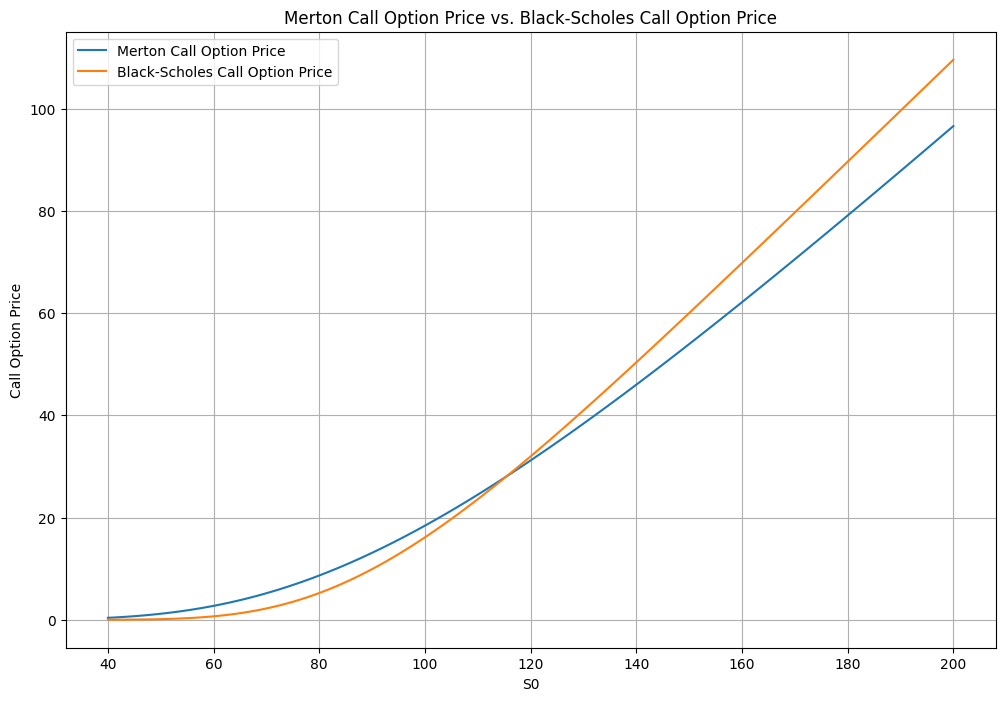

In [11]:
S0_values = np.linspace(40, 200, 120)
merton_prices = [merton_call_price(S0, K_default, T_default, r_default, sigma_default, lambda_tilde_default, muJ_default, sigmaJ_default, N=N_terms_default) for S0 in S0_values]
bs_prices = [black_scholes_call(S0, K_default, T_default, r_default, sigma_default) for S0 in S0_values]

plt.figure(figsize=(12, 8))
plt.title("Merton Call Option Price vs. Black-Scholes Call Option Price")
plt.plot(S0_values, merton_prices, label="Merton Call Option Price")
plt.plot(S0_values, bs_prices, label="Black-Scholes Call Option Price")
plt.xlabel("S0")
plt.ylabel("Call Option Price")
plt.legend()
plt.grid(True)
plt.show()

On peut regarder que la formule de black scholes est moins cher quand nous sommes ATM, parce que la probabilite de saut, d'etre sur le strike, est plus grande. Mais, quand nos sommes OTM, la formule de Merton est moins cher, parce que il y a une probabilité plus grand qu'il existe un saut qui nous mette sous le strike.

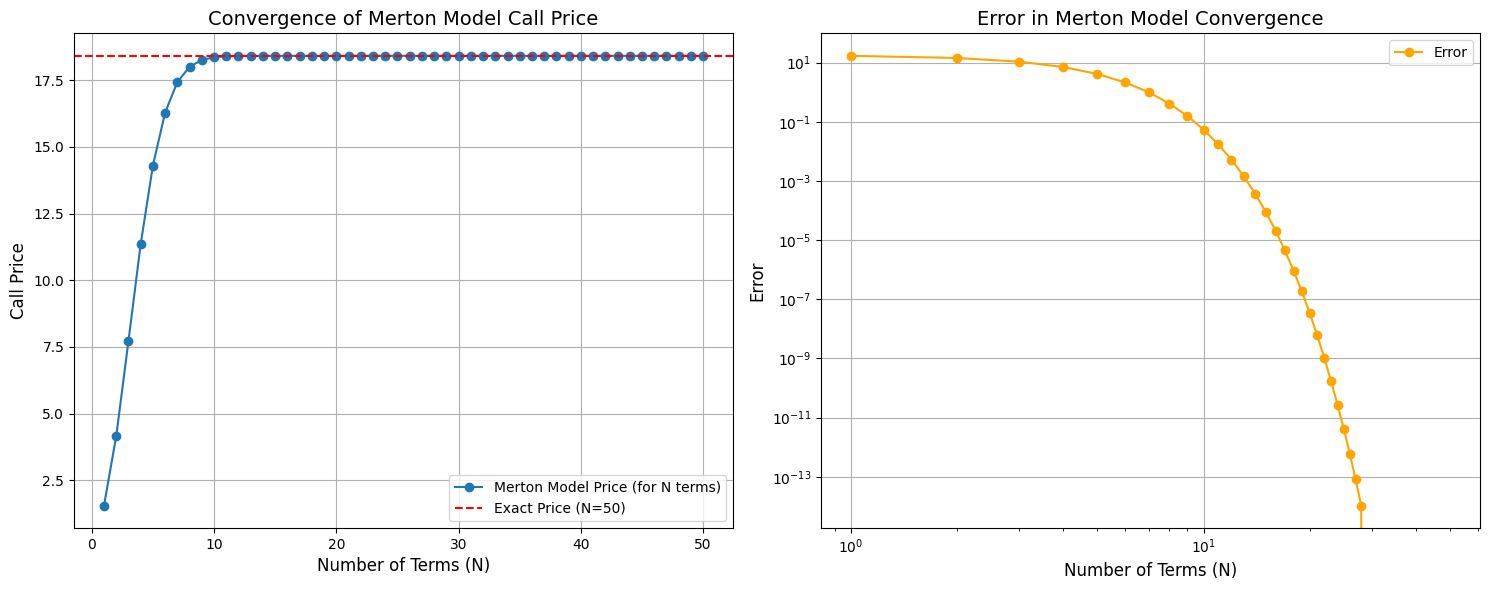

(np.float64(18.41348209621055), np.float64(18.41348209621055))

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute Merton call price and analyze convergence
def merton_call_convergence(S0, K, T, r, sigma, lamb, muJ, sigmaJ, max_terms=50):
    exact_price = merton_call_price(S0, K, T, r, sigma, lamb, muJ, sigmaJ, N=max_terms)  # Price with high N
    prices = []  # Store prices for increasing N
    errors = []  # Store errors (absolute difference from exact price)
    terms = list(range(1, max_terms + 1))
    
    for N in terms:
        price = merton_call_price(S0, K, T, r, sigma, lamb, muJ, sigmaJ, N)
        prices.append(price)
        errors.append(abs(price - exact_price))  # Calculate error
    
    # Creating subplots
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))

    # Plot 1: Convergence of Merton Model Call Price
    axs[0].plot(terms, prices, label="Merton Model Price (for N terms)", marker="o")
    axs[0].axhline(y=exact_price, color="r", linestyle="--", label="Exact Price (N=50)")
    axs[0].set_xlabel("Number of Terms (N)", fontsize=12)
    axs[0].set_ylabel("Call Price", fontsize=12)
    axs[0].set_title("Convergence of Merton Model Call Price", fontsize=14)
    axs[0].legend(fontsize=10)
    axs[0].grid()

    # Plot 2: Error of Convergence
    axs[1].plot(terms, errors, label="Error", marker="o", color="orange")
    axs[1].set_xlabel("Number of Terms (N)", fontsize=12)
    axs[1].set_ylabel("Error", fontsize=12)
    axs[1].set_xscale("log")
    axs[1].set_yscale("log")
    axs[1].set_title("Error in Merton Model Convergence", fontsize=14)
    axs[1].legend(fontsize=10)
    axs[1].grid()

    # Show plots
    plt.tight_layout()
    plt.show()
    
    return prices, exact_price

# Run the convergence analysis with default parameters
prices_convergence, exact_price_convergence = merton_call_convergence(
    S0_default, K_default, T_default, r_default,
    sigma_default, lambda_tilde_default, muJ_default, sigmaJ_default
)

prices_convergence[-1], exact_price_convergence

Les graphiques montrent la convergence des prix des options dans le modèle de Merton en fonction du nombre de termes \(N\). Sur le premier graphique, la convergence des prix est rapide et atteint une valeur stable dès \(N\) autour de 20. Dans le second graphique, l’erreur (la différence entre le prix calculé et le prix exact) diminue de manière extrêmement rapide, bien plus vite qu’une convergence exponentielle typique. En effet, l’erreur décroît de plusieurs ordres de grandeur, atteignant presque zéro pour \(N\) élevé.

Cela suggère que **l’ajout de nombreux termes supplémentaires au-delà de \(N = 20\)** n’a qu’un impact négligeable sur la précision du résultat. Par conséquent, dans une application pratique, augmenter significativement le nombre de termes ne serait pas utile et pourrait même alourdir les calculs sans avantage notable en termes de précision. 

Ainsi, on peut conclure que **le modèle converge très efficacement avec un nombre relativement faible de termes**, ce qui permet d’économiser du temps de calcul tout en conservant une grande précision.

### 4. Tracer le smile de volatilité implicite engendré par le modèle à sauts et analyser. Commenter.

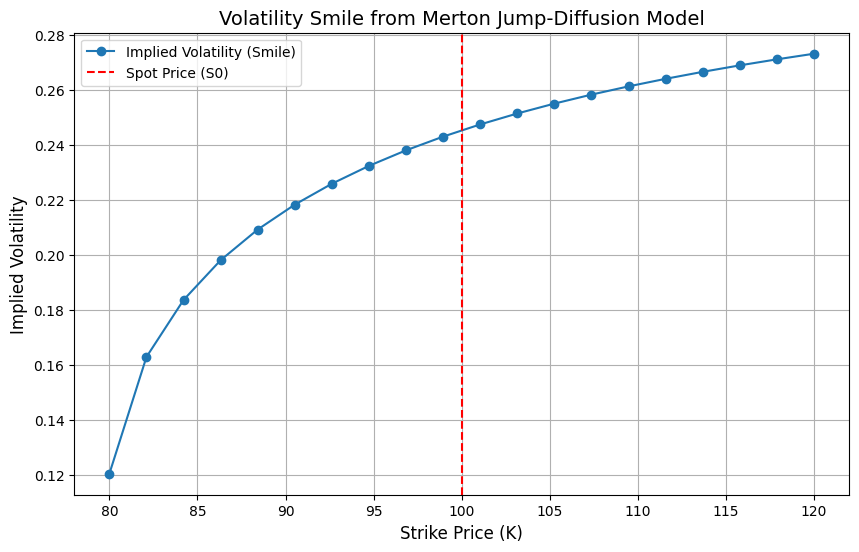

In [4]:
from scipy.optimize import brentq

# Function to compute implied volatility using Black-Scholes formula
def implied_volatility(S, K, T, r, market_price, initial_guess=0.2):
    def bs_price_diff(vol):
        return black_scholes_call(S, K, T, r, vol) - market_price
    
    # Solve for the implied volatility using Brent's method
    try:
        implied_vol = brentq(bs_price_diff, 1e-6, 5.0)  # Volatility is typically between 0% and 500%
    except ValueError:
        implied_vol = np.nan
    return implied_vol

# Generate strike prices for the smile
strike_prices = np.linspace(80, 120, 20)  # Strikes from 80 to 120
implied_vols = []

# Compute implied volatilities for each strike price
for K in strike_prices:
    # Compute the call price for each strike using the Merton model
    merton_price_for_strike = merton_call_price(
        S0_default, K, T_default, r_default,
        sigma_default, lambda_tilde_default, muJ_default, sigmaJ_default,
        N=N_terms_default
    )
    # Compute the implied volatility corresponding to this price
    imp_vol = implied_volatility(S0_default, K, T_default, r_default, merton_price_for_strike)
    implied_vols.append(imp_vol)

# Plot the volatility smile
plt.figure(figsize=(10, 6))
plt.plot(strike_prices, implied_vols, marker="o", label="Implied Volatility (Smile)")
plt.xlabel("Strike Price (K)", fontsize=12)
plt.ylabel("Implied Volatility", fontsize=12)
plt.title("Volatility Smile from Merton Jump-Diffusion Model", fontsize=14)
plt.axvline(x=S0_default, color="r", linestyle="--", label="Spot Price (S0)")
plt.legend(fontsize=10)
plt.grid()
plt.show()

Mes sources sont le livre de Wilmott et le livre de Rama Cont et lorsque $\mu_j$ est négatif dans le modèle de Merton avec sauts, la courbe de volatilité implicite s’inverse en raison de l’effet des sauts sur la distribution des rendements de l’actif sous-jacent. 

Un $\mu_j < 0$ implique que les sauts entraînent des baisses du prix de l’actif, introduisant une asymétrie négative dans la distribution des rendements. Cela augmente la probabilité de mouvements baissiers importants du style crash boursiers, ce qui accroît la demande pour les options de vente puts hors de la monnaie, qui deviennent plus chères.

Dans ce contexte, les volatilités implicites associées aux strikes faibles  sont plus élevées que celles des strikes élevés. En conséquence, le smile devient inversé ou asymétrique.
